In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Concrete_Data.xls")

In [3]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age', 'strength']

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength
0,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.229026
1,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.898158
2,385.0,0.0,0.0,186.0,0.0,966.0,763.0,7,23.221552
3,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,28,59.798253
4,147.8,175.1,0.0,171.2,2.2,1000.0,828.5,28,26.922659


In [6]:
df.shape

(1030, 9)

In [7]:
# Check for missing values
df.isna().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarse              0
fine                0
age                 0
strength            0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

25

In [9]:
# remove duplicates
df = df.drop_duplicates()

In [10]:
y = df['strength'].values
X = df.drop('strength', axis=1).values


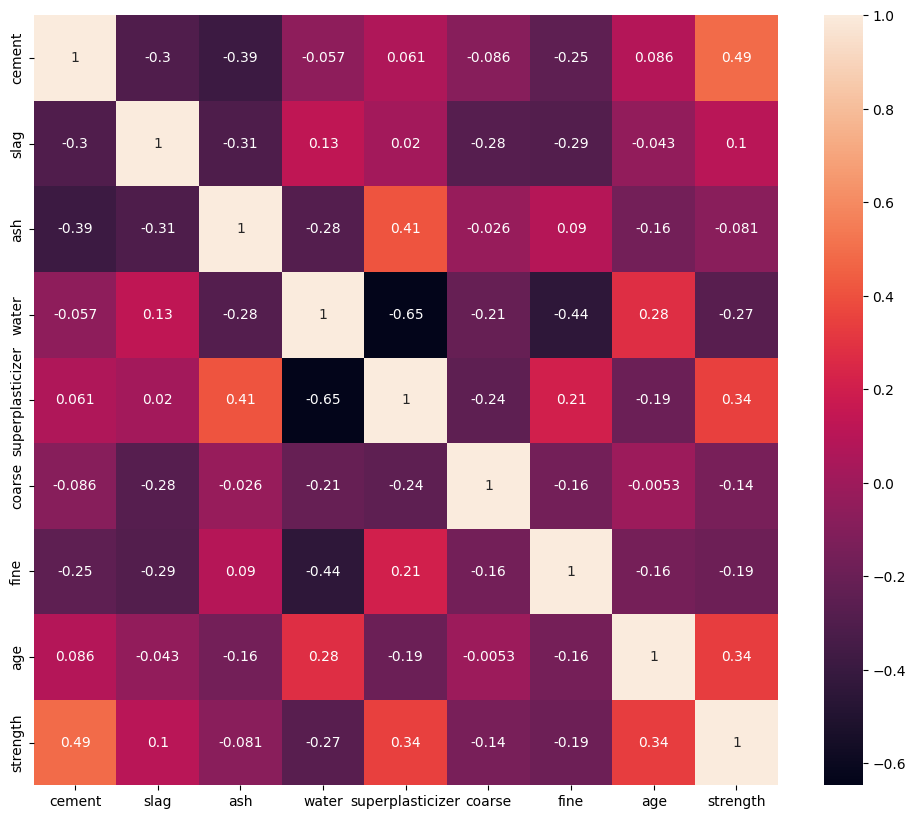

In [11]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

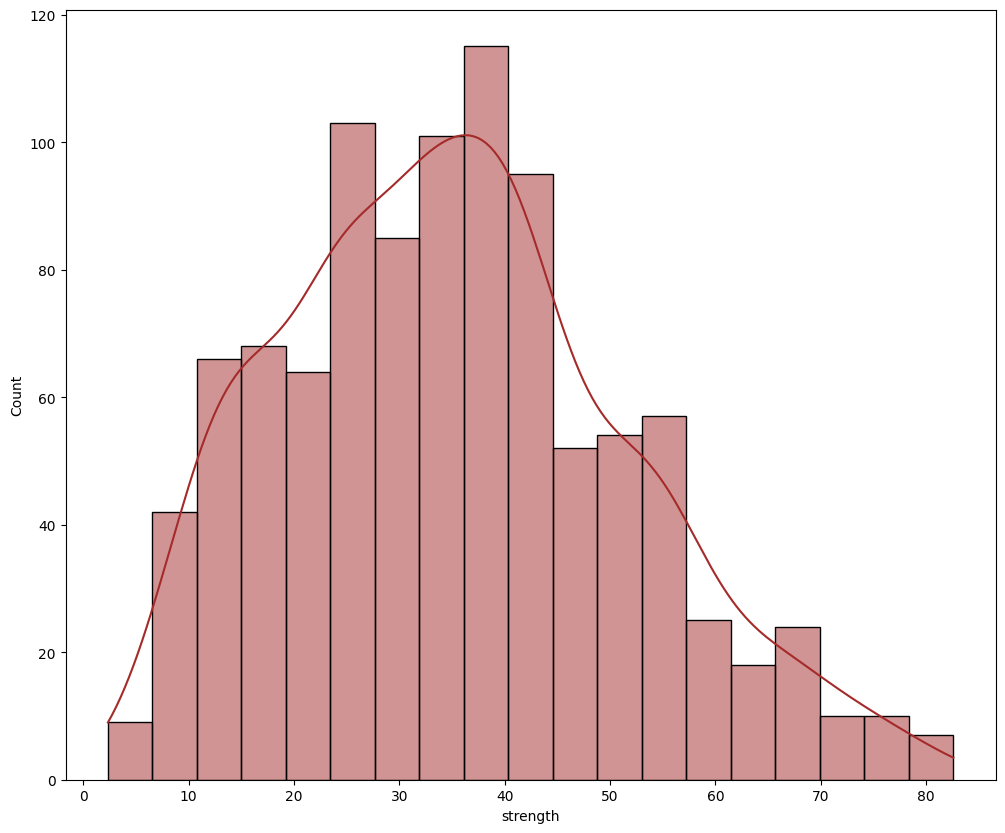

In [12]:
# visualize the distribution of the target variable
plt.figure(figsize=(12, 10))
sns.histplot(df['strength'], color='brown', kde=True)
plt.show()



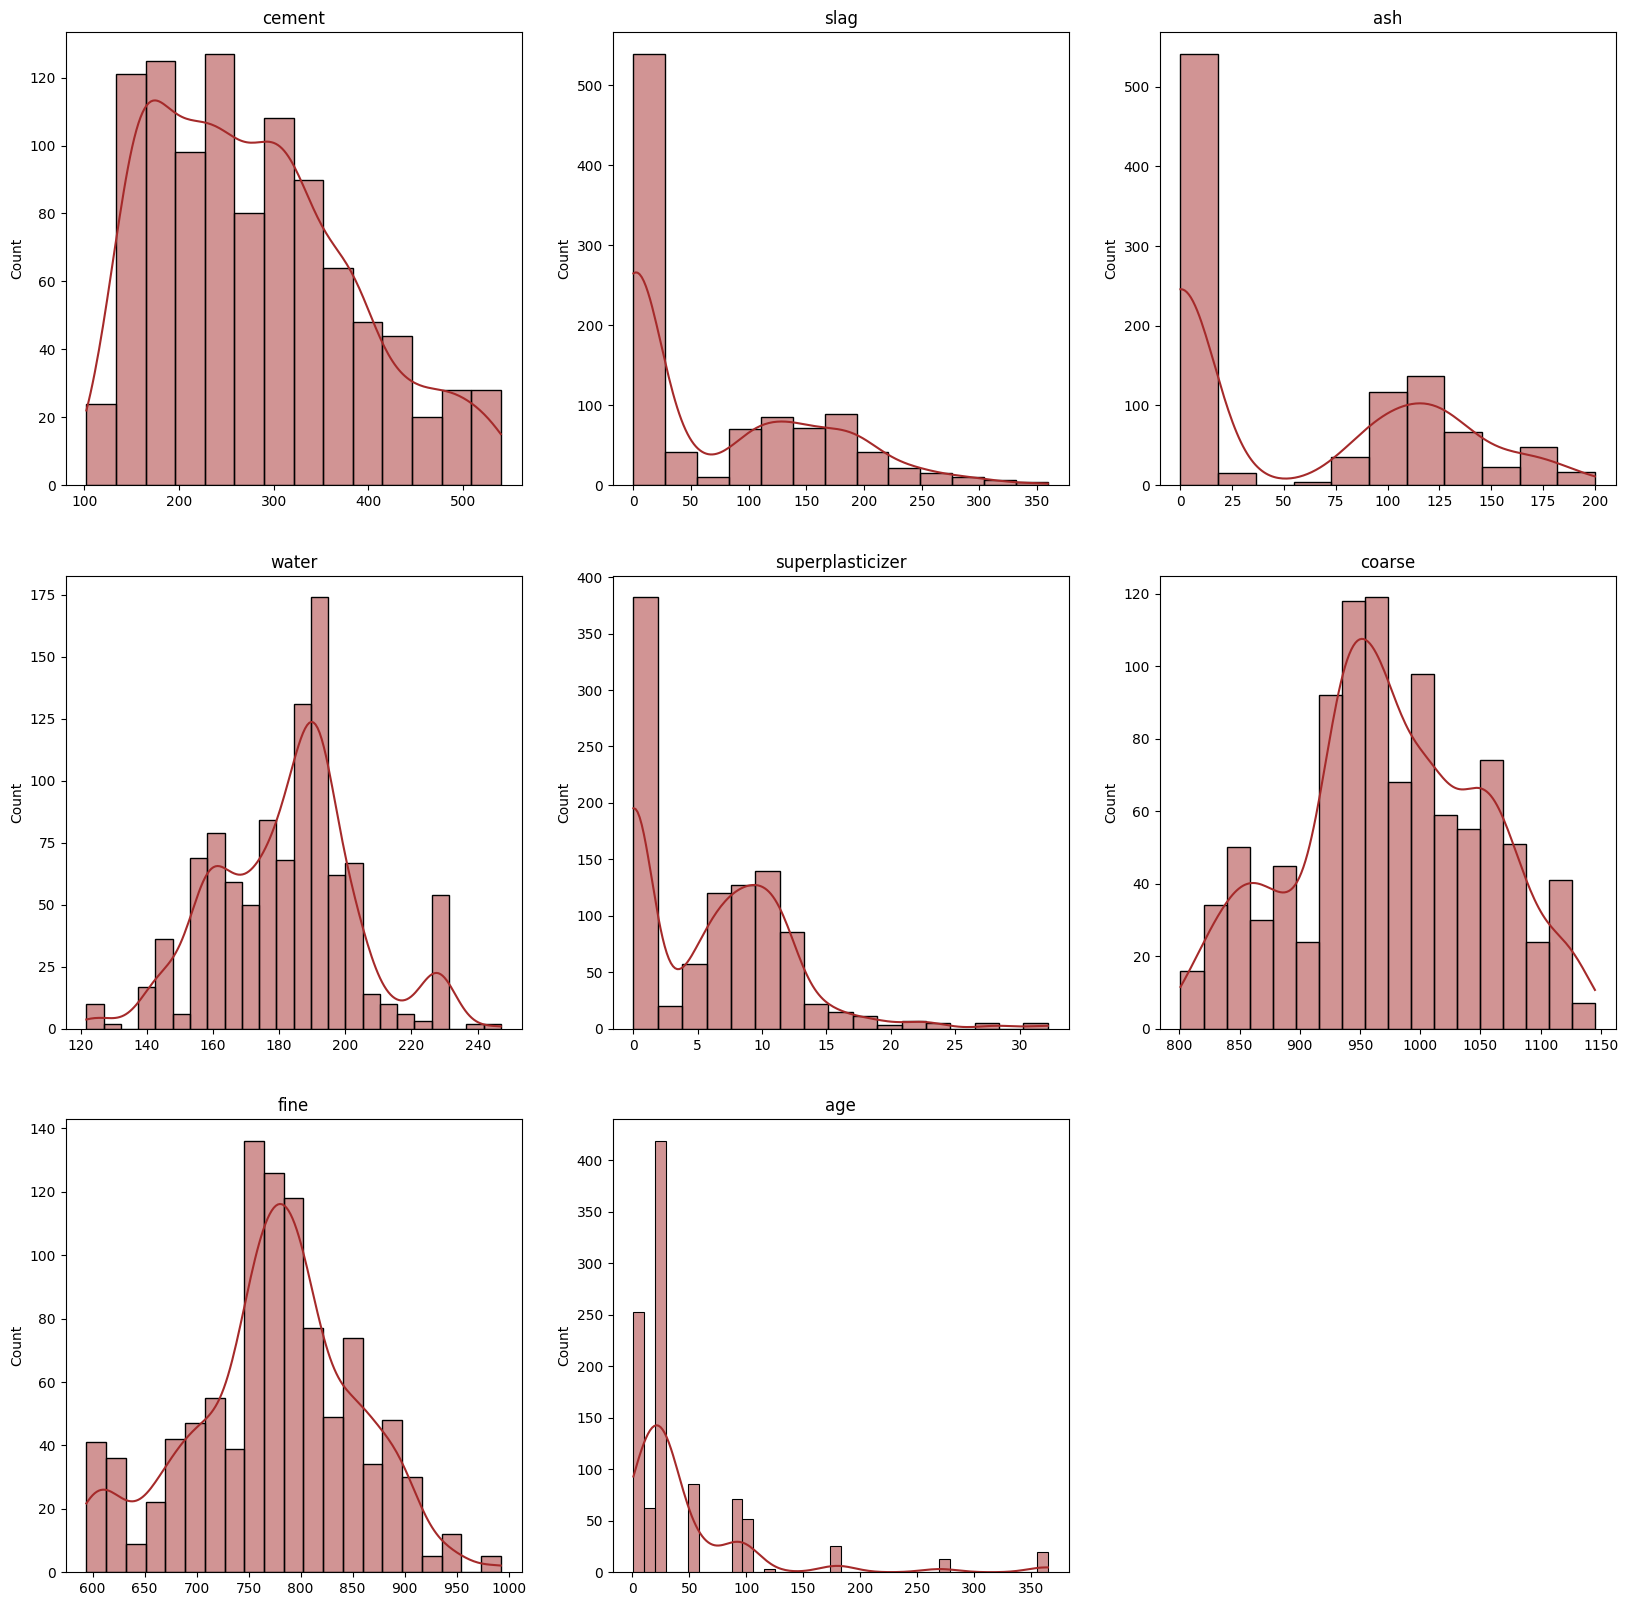

In [13]:
# visualize the distribution of the features
plt.figure(figsize=(20, 20))
for i in range(8):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[:, i], kde=True, color='brown')
    plt.title(df.columns[i])
plt.show()
    

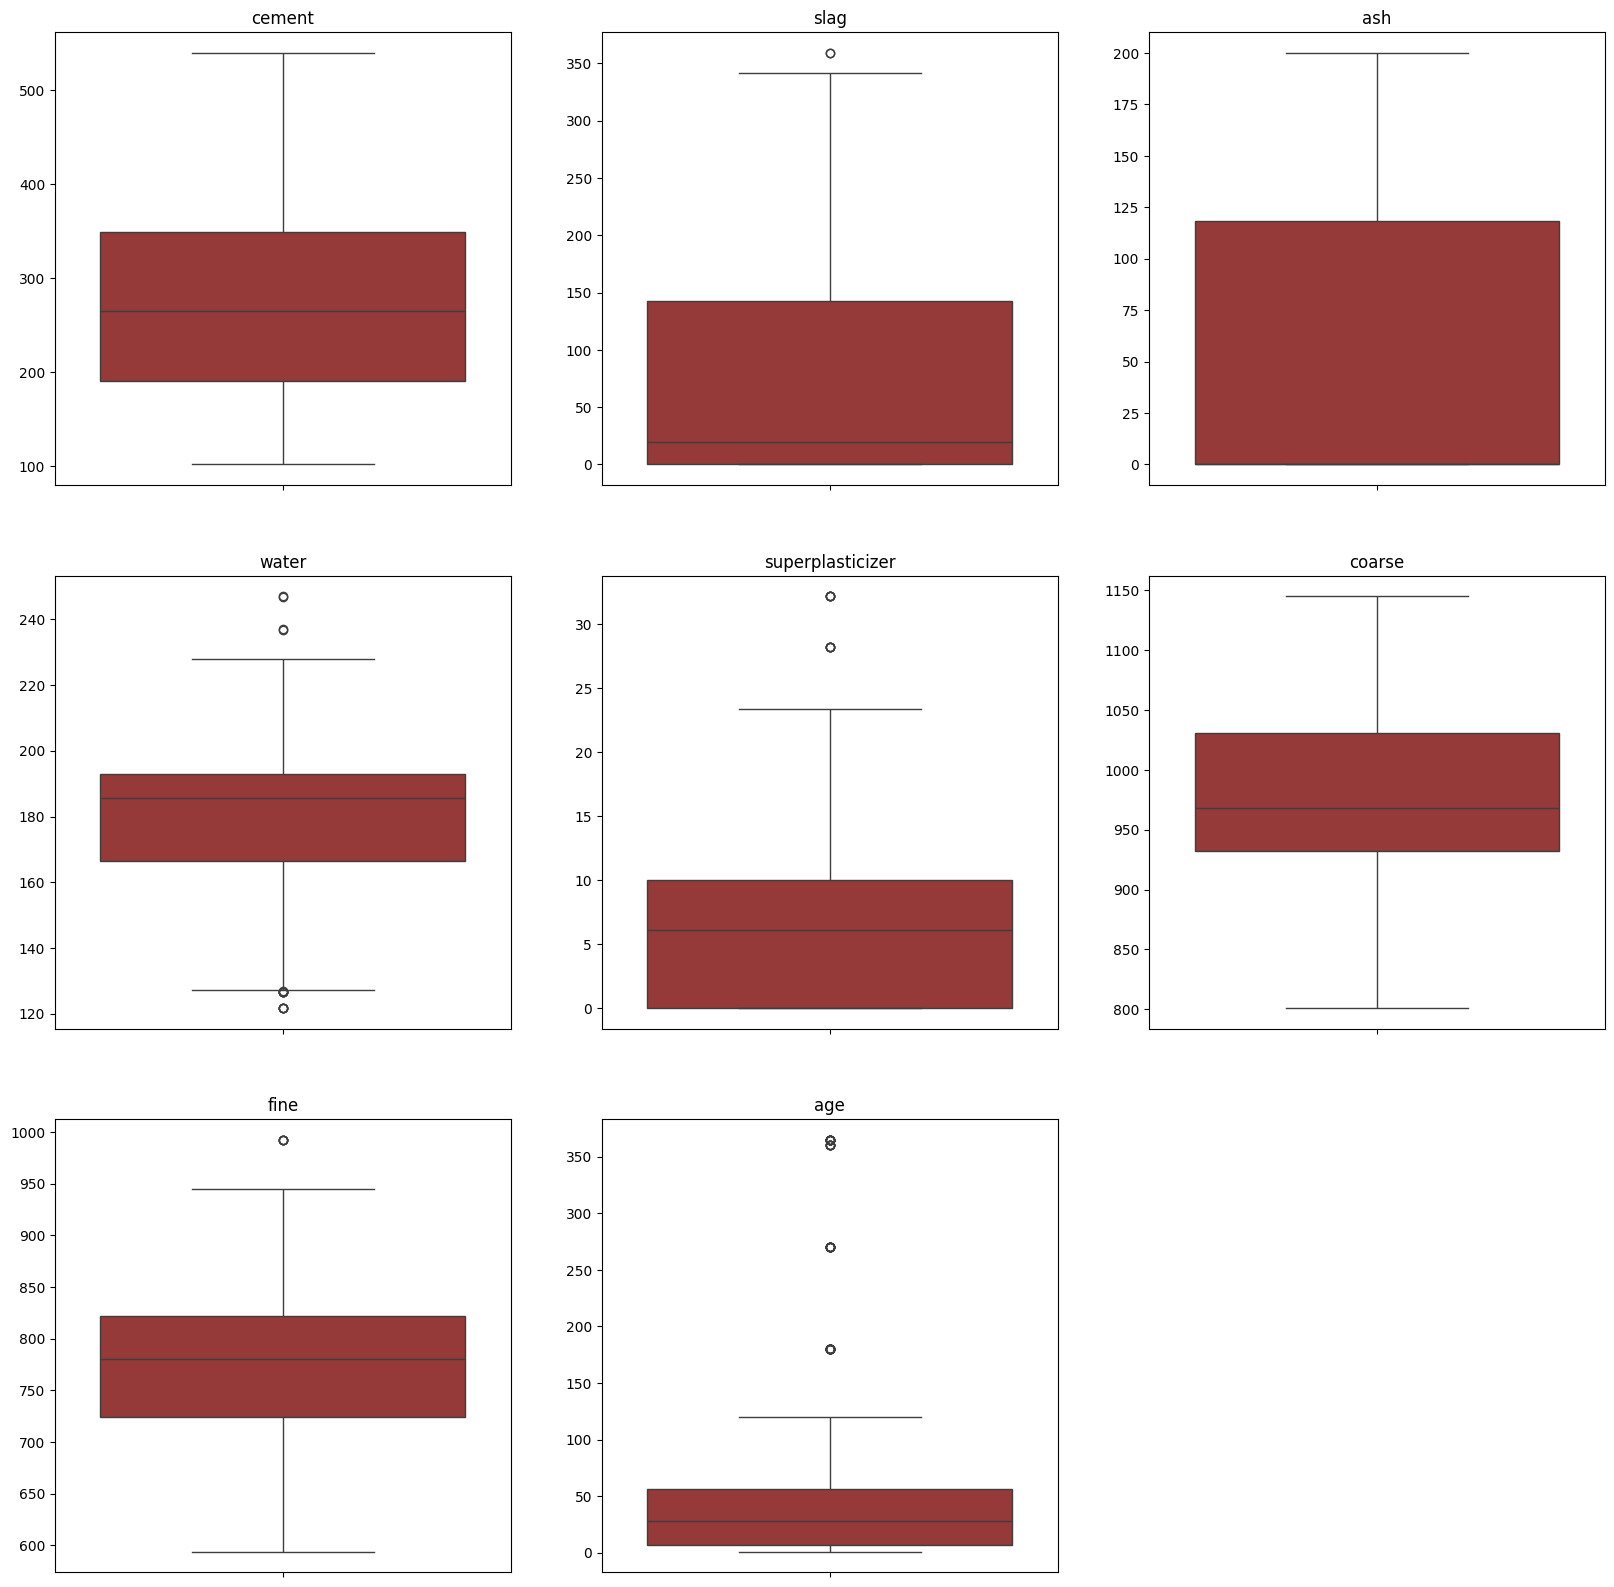

In [14]:
# boxplot of the features
plt.figure(figsize=(20, 20))
for i in range(8):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X[:, i], color='brown')
    plt.title(df.columns[i])

In [15]:
# export the cleaned data
df.to_csv('cleaned_concrete_data.csv', index=False)